In [21]:
import numpy as np

# Path to the saved encoded data file
encoded_data_path = '/Users/leo/Programming/PLR/Leo/main/final/grid_autoencoder/cluster_solutions/encoded_data_5_5.npy'

# Load the encoded data
data_encoded = np.load(encoded_data_path)

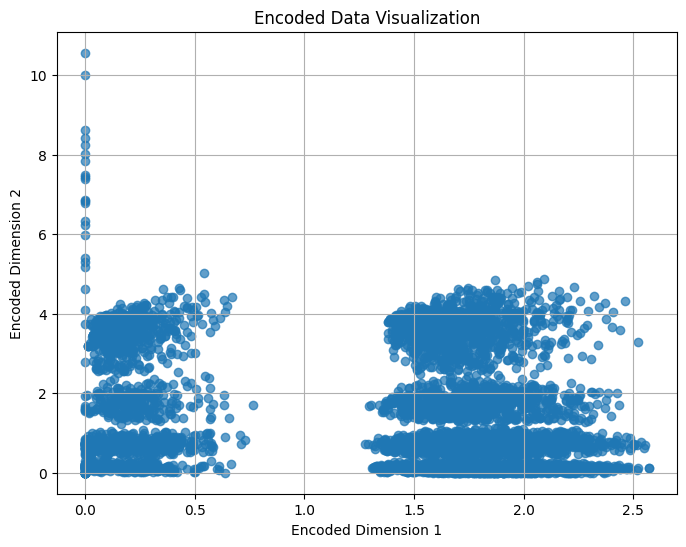

In [22]:
import matplotlib.pyplot as plt

def plot_encoded_data(encoded_data, title="Encoded Data Visualization"):
    """
    Plot the encoded data using a scatter plot.

    Parameters:
    encoded_data (np.array): The encoded data to plot.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], alpha=0.7)
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Call the function to plot the data
plot_encoded_data(data_encoded)


Best Silhouette Score: 0.5499109625816345
Best Configuration: min_cluster_size=37, min_samples=6


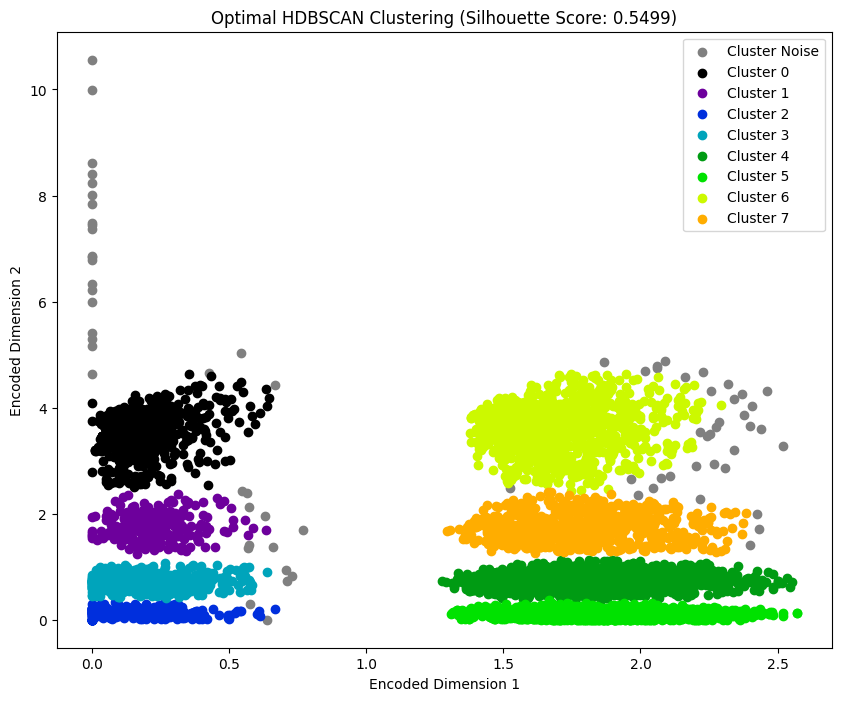

In [26]:
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Load the encoded data
encoded_data_path = '/Users/leo/Programming/PLR/Leo/main/final/grid_autoencoder/cluster_solutions/encoded_data_5_5.npy'
data_encoded = np.load(encoded_data_path)

def evaluate_hdbscan(data, min_cluster_size, min_samples):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = clusterer.fit_predict(data)
    if len(set(labels)) > 1:  # More than one cluster (excluding noise)
        score = silhouette_score(data, labels)
        return score, (min_cluster_size, min_samples), labels
    else:
        return -1, (min_cluster_size, min_samples), None

# Define the range of parameters you want to search
min_cluster_size_range = range(2, 45)  # Example range
min_samples_range = range(1, 20)  # Example range

# Prepare parameter combinations
param_combinations = [(size, samples) for size in min_cluster_size_range for samples in min_samples_range]

# Parallel processing
results = Parallel(n_jobs=-1)(delayed(evaluate_hdbscan)(data_encoded, size, samples) for size, samples in param_combinations)

# Extract the best result
best_score, best_config, best_labels = max(results, key=lambda x: x[0])

print(f"Best Silhouette Score: {best_score}")
print(f"Best Configuration: min_cluster_size={best_config[0]}, min_samples={best_config[1]}")

# Visualization of the best result
plt.figure(figsize=(10, 8))
unique_labels = np.unique(best_labels)
for label in unique_labels:
    color = 'grey' if label == -1 else plt.cm.nipy_spectral(float(label) / len(unique_labels))
    plt.scatter(data_encoded[best_labels == label, 0], data_encoded[best_labels == label, 1], c=[color], label=f'Cluster {label if label != -1 else "Noise"}')

plt.title(f'Optimal HDBSCAN Clustering (Silhouette Score: {best_score:.4f})')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.legend()
plt.show()


In [27]:
import pandas as pd
import numpy as np
import hdbscan

# Load the original data
dataset_path = '/Users/leo/Programming/PLR/Leo/data/dataset_5.csv'
original_data = pd.read_csv(dataset_path).drop(columns=["Unnamed: 0"])

# Load the encoded data
encoded_data_path = '/Users/leo/Programming/PLR/Leo/main/final/grid_autoencoder/cluster_solutions/encoded_data_5_5.npy'
data_encoded = np.load(encoded_data_path)

# Apply HDBSCAN with the best parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=37, min_samples=6)
cluster_labels = clusterer.fit_predict(data_encoded)

# Add the cluster labels to the original data
original_data['cluster'] = cluster_labels

In [28]:
original_data

,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_fastthoughts,Symptom_Cognitive_Functioning_agnosia,Symptom_Cognitive_Functioning_other,Symptom_Speech_difficulty_finding_words,Symptom_Speech_difficulty_communicating_verbally,...,Symptom_Reproductive_other_menstrual_issues,Symptom_Reproductive_abnormally_irregular_periods,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_Change_sensitivity_to_meds,Symptom_New_allergies,cluster
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,4
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,1,0,6
6027,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,6
6028,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,-1
6029,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,7
